<a href="https://colab.research.google.com/github/bkn872/computer_vision/blob/main/Resubmit__Computer_vision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computer Vision Module Project

# ***Part A - 30 Marks*** 

**• DOMAIN:** Botanical Research

**• CONTEXT:** University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at
various stages of growth. They already have have invested on curating sample images. They require an automation which can create a
classifier capable of determining a plant's species from a photo.

**• DATA DESCRIPTION:** The dataset comprises of images from 12 plant species.
Source: https://www.kaggle.com/c/plant-seedlings-classification/data.

**• PROJECT OBJECTIVE:** To create a classifier capable of determining a plant's species from a photo




# **1.1. Import and Understand the data [12 Marks]**

### 1.1.A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python. [2 Marks]

In [1]:
import numpy as np # MATRIX OPERATIONS
import pandas as pd # EFFICIENT DATA STRUCTURES
import matplotlib.pyplot as plt # GRAPHING AND VISUALIZATIONS
import math # MATHEMATICAL OPERATIONS
import cv2 # IMAGE PROCESSING - OPENCV
from glob import glob # FILE OPERATIONS
import itertools
# KERAS AND SKLEARN MODULES
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# GLOBAL VARIABLES
scale = 70
seed = 7

In [2]:
%tensorflow_version 2.x

from google.colab import drive
drive.mount('/content/drive')

path_to_images = "/content/drive/MyDrive/Python/CV/plant_seedlings_classification.zip"


#path_to_images = 'plant-seedlings-classification/train/png'
images = glob(path_to_images)
trainingset = []
traininglabels = []
num = len(images)
count = 1
#READING IMAGES AND RESIZING THEM
for i in images:
    print(str(count)+'/'+str(num),end='r')
    trainingset.append(cv2.resize(cv2.imread(i),(scale,scale)))
    traininglabels.append(i.split('/')[-2])
    count=count+1
trainingset = np.asarray(trainingset)
traininglabels = pd.DataFrame(traininglabels)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Mounted at /content/drive
1/1r

error: ignored

IndexError: ignored

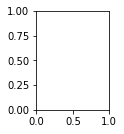

In [9]:
new_train = []
sets = []; getEx = True
for i in trainingset:
    blurr = cv2.GaussianBlur(i,(5,5),0)
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
    #GREEN PARAMETERS
    lower = (25,40,50)
    upper = (75,255,255)
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    new_train.append(new)
    if getEx:
        plt.subplot(2,3,1);plt.imshow(i) # ORIGINAL
        plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
        plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
        plt.subplot(2,3,4);plt.imshow(mask) # MASKED
        plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
        plt.subplot(2,3,6);plt.imshow(new) # NEW PROCESSED IMAGE
        plt.show()
        getEx = False
new_train = np.asarray(new_train)
# CLEANED IMAGES
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(new_train[i])

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import zipfile

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
images_path = "/content/drive/MyDrive/Python/CV/plant_seedlings_classification.zip"

#Extract Zip File

In [5]:
from zipfile import ZipFile
with ZipFile(images_path,'r') as zip:
  zip.extractall()

In [6]:
!ls

drive  __MACOSX  plant-seedlings-classification  sample_data


In [7]:
#to know the all files in the zip 
#zip.printdir()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Read the image
#import skimage.io as io
#import matplotlib.pyplot as plt
#img = io.imread("/content/drive/MyDrive/Python/CV/pflower.jpg")


#plt.imshow(img)
#plt.show()

### 1.1.B. Map the images from train folder with train labels to form a DataFrame. [6 Marks]

Hint: Create a DataFrame with 3 columns: Name of image, Species/class/type of image & actual image..

In [ ]:
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
classifier.add(Dropout(0.5))


# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 5 neuron to predict the categorical classifcation
classifier.add(Dense(units = 5, activation = 'softmax'))

In [ ]:
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Create data generator for training data with data augmentation and normalizing all
# values by 255
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

# Setting training data generator's source directory
# Setting the target size to resize all the images to (64,64) as the model input layer expects 32X32 images

training_set = train_datagen.flow_from_directory('./plant_seedlings_classification/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Setting testing data generator's source directory
test_set = test_datagen.flow_from_directory('./plant_seedlings_classification/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


# There are 3823 training images and 500 test images in total
classifier.fit_generator(training_set,
                         steps_per_epoch = int(3823/32),
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = int(500/32))

FileNotFoundError: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Create data generator for training data with data augmentation and normalizing all
# values by 255
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

# Setting training data generator's source directory
# Setting the target size to resize all the images to (64,64) as the model input layer expects 32X32 images


In [ ]:
import os
os.chdir(r"/content/drive/My Drive")

training_set = train_datagen.flow_from_directory('./plant_seedlings_classification/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')



FileNotFoundError: ignored

In [ ]:

# Setting testing data generator's source directory
test_set = test_datagen.flow_from_directory('./plant_seedlings_classification/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


# There are 3823 training images and 500 test images in total
classifier.fit_generator(training_set,
                         steps_per_epoch = int(3823/32),
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = int(500/32))

In [ ]:
classifier.save('./classifier.h5')

classifier.save_weights('./classifier_weights.h5')

In [ ]:
!ls

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the pre trained model from the HDF5 file saved previously
pretrained_model = load_model('./classifier.h5')
pretrained_model.load_weights('./classifier_weights.h5')

In [ ]:
# Re-initalizing the test data generator with shuffle=False to create the confusion matrix
test_set = test_datagen.flow_from_directory('./plant-seedlings-classification',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            shuffle=False,
                                            class_mode = 'categorical')

# Predict the whole generator to get predictions
Y_pred = classifier.predict_generator(test_set, int(500/32+1))

# Find out the predictions classes with maximum probability
y_pred = np.argmax(Y_pred, axis=1)

# Utilities for confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Printing the confusion matrix based on the actual data vs predicted data. 
print(confusion_matrix(test_set.classes, y_pred))

# Printing the classification report
print(classification_report(test_set.classes, y_pred, target_names=prediction_class))

In [ ]:

import os

### 1.1.C. Write a function that will select n random images and display images along with its species. [4 Marks]

Hint: If input for function is 5, it should print 5 random images along with its labels


In [ ]:
from zipFile import Zipfile 
with ZipFile('content/drive/MyDrive/Python/CV/plant-seedlings-classification.zip','r') as zipObj:
zipObj.extractall ('content/drive/MyDrive/test')

In [ ]:
print(type(images_path))

In [ ]:
img_rows=128
img_cols=128
num_channel=1

# **2. Data preprocessing [8 Marks]**

### A. Create X & Y from the DataFrame. [2 Marks]

### B. Encode labels of the images. [2 Marks]

### C. Unify shape of all the images. [2 Marks]

### D. Normalise all the images. [2 Marks]

### 3. Model training [10 Marks]

### Checkpoint: Please make sure if shape of X is (No.of images, height, width, No. Of channels). If not, you need to correct it otherwise it will be issue during model training

### A. Split the data into train and test data. [2 Marks]

### B. Create new CNN architecture to train the model. [4 Marks]

In [ ]:
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
classifier.add(Dropout(0.5))


# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 5 neuron to predict the categorical classifcation
classifier.add(Dense(units = 5, activation = 'softmax'))

In [ ]:
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

### C. Train the model on train data and validate on test data. [2 Marks]

### D. Select a random image and print actual label and predicted label for the same. [2 Marks]

# **Part B - 30 Marks**


**• DOMAIN:** Botanical Research

**• CONTEXT:** University X is currently undergoing some research involving understanding the characteristics of flowers. They already have
have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s
species from a photo.

**• DATA DESCRIPTION:** The dataset comprises of images from 17 plant species.

**• PROJECT OBJECTIVE:** To experiment with various approaches to train an image classifier to predict type of flower from the image.

## **Steps and tasks: [ Total Score: 30 Marks]**

# **1. Import and Understand the data [5 Marks]**

### A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading. [2 Marks]

Hint: It can be imported from tflearn.datasets. If tflearn is not installed, install it.

It can be loaded using: x, y = oxflower17.load_data() 

In [1]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Flatten


In [ ]:
#!pip

In [2]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.9.2'

In [ ]:
#!apt

In [ ]:
#conda install pip
#!pip install tflearn

In [ ]:
#import tflearn.datasets.oxflower17 as oxflower17

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
pip install tflearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=6958daf6674c9a501ae825743fe230299f4e27560fb5c7342be4b9391b959678
  Stored in directory: /root/.cache/pip/wheels/65/9b/15/cb1e6b279c14ed897530d15cfd7da8e3df8a947e593f5cfe59
Successfully built tflearn


In [8]:
import tflearn

Instructions for updating:
non-resource variables are not supported in the long term


In [9]:
import tflearn.datasets.oxflower17 as oxflower17 
# X, Y = oxflower17.load_data(one_hot=True, resize_pics=(227, 227)) 

In [10]:
X, Y = oxflower17.load_data(one_hot=True, resize_pics=(227, 227)) 

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [13]:
#from tensorflow.keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = oxflower17.load_data()

ValueError: ignored

In [ ]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read the image
img = io.imread("/content/drive/MyDrive/Python/CV/pflower.jpg")


plt.imshow(img)
plt.show()

In [ ]:
#pickle.load(open(dataset_file, 'rb'), encoding='latin1')

In [ ]:
img.shape

In [ ]:
# Split
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

In [ ]:
plt.imshow(red, cmap="Reds")
plt.show()

In [ ]:
plt.imshow(green, cmap="Greens")
plt.show()

In [ ]:
plt.imshow(blue, cmap="Blues")
plt.show()

In [ ]:
def filtering(img, f=3):
    
    # Dimensions from the input shape
    (rows, col, channels) = img.shape
    
    # Initialize "hyper parameters"
    stride = 2
    
    # Dimensions of the output
    n_rows = int(1 + (rows - f) / stride)
    n_col = int(1 + (col - f) / stride)
    n_channels = channels
    
    # Initialize output matrix A
    n_img = np.zeros((n_rows, n_col, n_channels))              
    
    # iterate through img
    for h in range(n_rows):                     
        for w in range(n_col):                 
            for c in range (n_channels):            
                vert_start = h*stride
                vert_end = vert_start + f
                horiz_start = w*stride
                horiz_end = horiz_start + f

                # extract slice we are dealing with
                n_slice = img[vert_start:vert_end, horiz_start:horiz_end, c]

                # Compute the filtering operation on the slice
                n_img[h, w, c] = np.mean(n_slice, dtype=int)
    return n_img

In [ ]:
A = filtering(img)
print(A.shape)
plt.imshow(A)
plt.show()

In [ ]:
A = filtering(img, f=11)
print (A.shape)
plt.imshow(A)
plt.show()

In [ ]:
A = filtering(img, f=25)
print(A.shape)
plt.imshow(A)
plt.show()

### B. Print Number of images and shape of the images. [1 Marks]

### C. Print count of each class from y. [2 Marks]

# **2. Image Exploration & Transformation [Learning purpose - Not related to final model] [10 Marks]**

### A. Display 5 random images. [1 Marks]

### B. Select any image from the dataset and assign it to a variable. [1 Marks]

### C. Transform the image into grayscale format and display the same. [3 Marks]

In [ ]:
plt.imshow(image2[:,:,0],cmap='gray')

### D. Apply a filter to sharpen the image and display the image before and after sharpening. [2 Marks]

### E. Apply a filter to blur the image and display the image before and after blur. [2 Marks]

### F. Display all the 4 images from above questions besides each other to observe the difference. [1 Marks]

# **3. Model training and Tuning: [15 Marks]**

### A. Split the data into train and test with 80:20 proportion. [2 Marks]

### B. Train a model using any Supervised Learning algorithm and share performance metrics on test data. [3 Marks]

### C. Train a model using Neural Network and share performance metrics on test data. [4 Marks]

### D. Train a model using a basic CNN and share performance metrics on test data. [4 Marks]

### E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label. [2 Marks]